## Install Required Libraries

In [13]:
# Install textblob for sentiment analysis
# %pip install textblob pandas matplotlib seaborn

## Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## Load Cleaned Data

In [15]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_01.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
display(df.head())

print(f"\nData Summary:")
print(f"  Total responses: {len(df)}")
print(f"  Unique candidates: {df['name'].nunique()}")
print(f"  Unique parties: {df['party'].nunique()}")

Dataset shape: (119, 7)

Columns: ['candidate_id', 'name', 'party', 'municipality', 'question_number', 'question_text', 'answer_text']

First few rows:


,candidate_id,name,party,municipality,question_number,question_text,answer_text
0,5725,Sine Heltberg,A,Frederiksberg Kommune,6,NaN,Se Sines svar1/19| økonomi| Frederiksberg Komm...
1,5719,Malte Mathies Løcke,A,Frederiksberg Kommune,6,NaN,Se Malte Mathies' svar1/19| økonomi| Frederiks...
2,5710,Christina Sylvest-Noer,A,Frederiksberg Kommune,6,NaN,Se Christinas svar1/19| økonomi| Frederiksberg...
3,5729,Thomas Frank,A,Frederiksberg Kommune,6,NaN,Se Thomas' svar1/19| økonomi| Frederiksberg Ko...
4,5726,Sofie Kümpel,A,Frederiksberg Kommune,6,NaN,Se Sofies svar1/19| økonomi| Frederiksberg Kom...



Data Summary:
  Total responses: 119
  Unique candidates: 119
  Unique parties: 14


## Define Sentiment Analysis Function

In [16]:
def analyze_sentiment(text):
    """
    Analyze sentiment of text using TextBlob
    Returns polarity (-1 to 1) and subjectivity (0 to 1)
    """
    if pd.isna(text) or text == '':
        return np.nan, np.nan
    
    try:
        blob = TextBlob(str(text))
        return blob.sentiment.polarity, blob.sentiment.subjectivity
    except:
        return np.nan, np.nan

def classify_sentiment(polarity):
    """
    Classify sentiment based on polarity score
    """
    if pd.isna(polarity):
        return 'Unknown'
    elif polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

print("✅ Sentiment analysis functions defined")

✅ Sentiment analysis functions defined


## Perform Sentiment Analysis

In [17]:
print("Analyzing sentiment for all answer texts...")
print("This may take a few minutes...\n")

# Apply sentiment analysis
df[['sentiment_polarity', 'sentiment_subjectivity']] = df['answer_text'].apply(
    lambda x: pd.Series(analyze_sentiment(x))
)

# Classify sentiment
df['sentiment_category'] = df['sentiment_polarity'].apply(classify_sentiment)

print("✅ Sentiment analysis complete!\n")
print(f"Results:")
print(f"  Polarity range: {df['sentiment_polarity'].min():.3f} to {df['sentiment_polarity'].max():.3f}")
print(f"  Mean polarity: {df['sentiment_polarity'].mean():.3f}")
print(f"  Median polarity: {df['sentiment_polarity'].median():.3f}")
print(f"\nSentiment Distribution:")
print(df['sentiment_category'].value_counts())

Analyzing sentiment for all answer texts...
This may take a few minutes...

✅ Sentiment analysis complete!

Results:
  Polarity range: -0.282 to 0.119
  Mean polarity: -0.096
  Median polarity: -0.064

Sentiment Distribution:
sentiment_category
Neutral     67
Negative    51
Positive     1
Name: count, dtype: int64


## Visualize Overall Sentiment Distribution

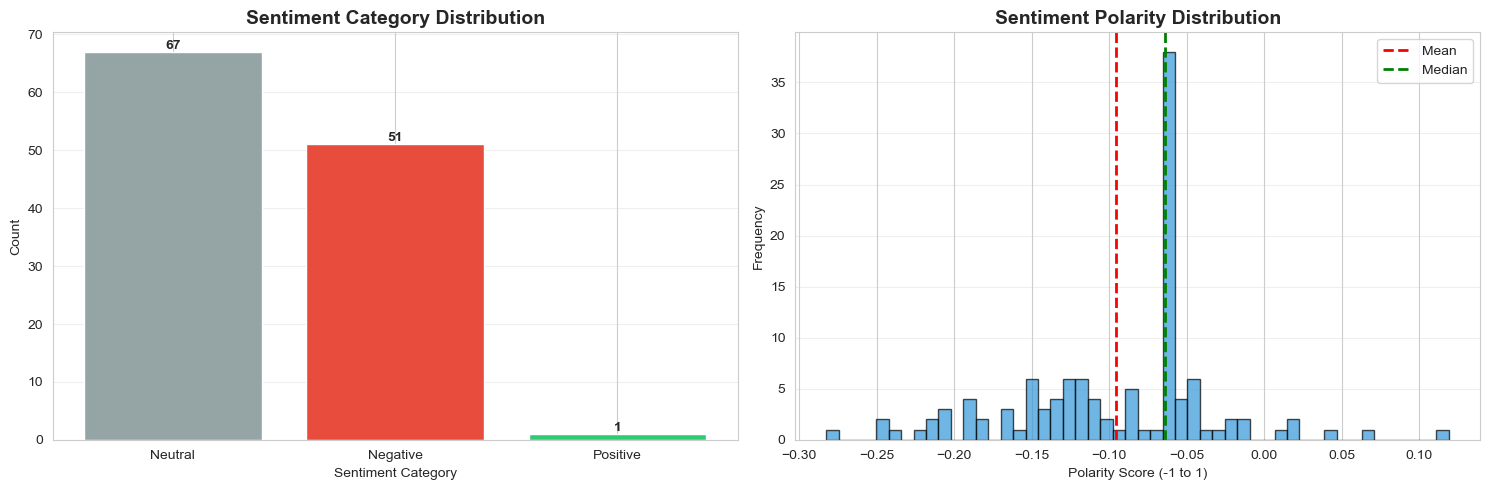

In [18]:
# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Sentiment category distribution
sentiment_counts = df['sentiment_category'].value_counts()
colors = {'Positive': '#2ecc71', 'Neutral': '#95a5a6', 'Negative': '#e74c3c', 'Unknown': '#bdc3c7'}
sentiment_colors = [colors.get(cat, '#bdc3c7') for cat in sentiment_counts.index]

axes[0].bar(sentiment_counts.index, sentiment_counts.values, color=sentiment_colors)
axes[0].set_title('Sentiment Category Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentiment Category')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, (cat, count) in enumerate(sentiment_counts.items()):
    axes[0].text(i, count, str(count), ha='center', va='bottom', fontweight='bold')

# Polarity score distribution
axes[1].hist(df['sentiment_polarity'].dropna(), bins=50, color='#3498db', edgecolor='black', alpha=0.7)
axes[1].axvline(df['sentiment_polarity'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[1].axvline(df['sentiment_polarity'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[1].set_title('Sentiment Polarity Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Polarity Score (-1 to 1)')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Sentiment by Party

Sentiment by Party:


,Mean_Polarity,Median_Polarity,Std_Polarity,Response_Count
party,,,,
T,-0.047,-0.047,NaN,1
E,-0.048,-0.048,NaN,1
D,-0.061,-0.061,NaN,1
O,-0.064,-0.064,0.056,2
B,-0.072,-0.061,0.068,9
Æ,-0.073,-0.073,NaN,1
F,-0.075,-0.061,0.078,12
A,-0.094,-0.071,0.052,20
C,-0.094,-0.074,0.081,28


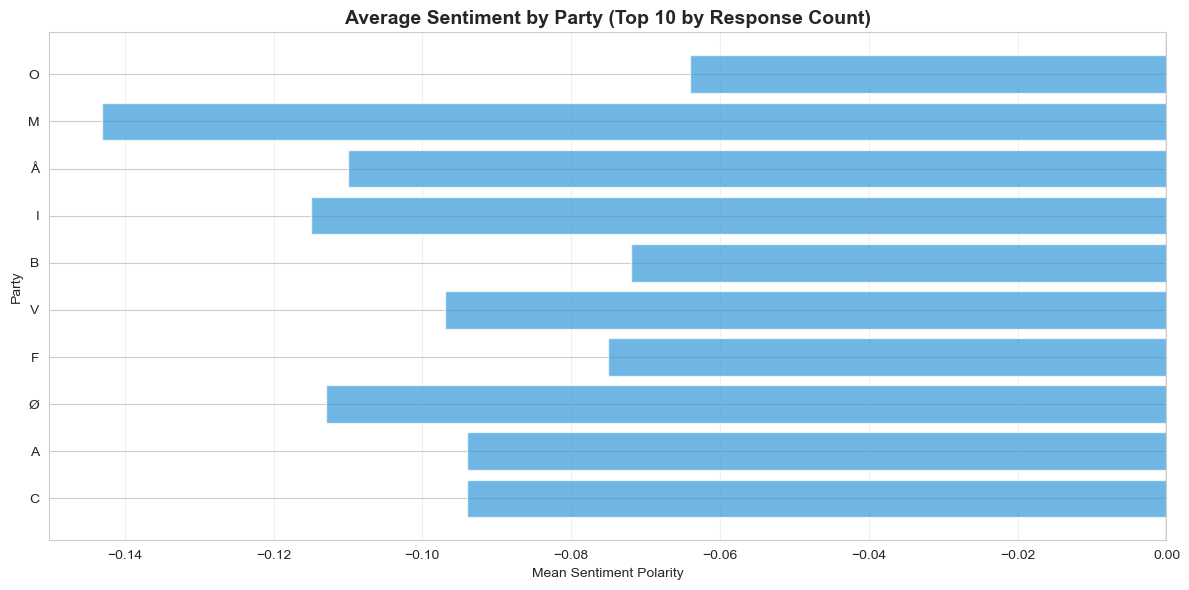

In [19]:
# Calculate average sentiment by party
party_sentiment = df.groupby('party').agg({
    'sentiment_polarity': ['mean', 'median', 'std', 'count']
}).round(3)

party_sentiment.columns = ['Mean_Polarity', 'Median_Polarity', 'Std_Polarity', 'Response_Count']
party_sentiment = party_sentiment.sort_values('Mean_Polarity', ascending=False)

print("Sentiment by Party:")
print("="*80)
display(party_sentiment)

# Visualize top 10 parties by response count
top_parties = party_sentiment.nlargest(10, 'Response_Count')

plt.figure(figsize=(12, 6))
plt.barh(top_parties.index, top_parties['Mean_Polarity'], color='#3498db', alpha=0.7)
plt.axvline(0, color='black', linestyle='-', linewidth=0.8)
plt.xlabel('Mean Sentiment Polarity')
plt.ylabel('Party')
plt.title('Average Sentiment by Party (Top 10 by Response Count)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Sentiment by Candidate

In [20]:
# Calculate average sentiment by candidate
candidate_sentiment = df.groupby(['name', 'party']).agg({
    'sentiment_polarity': ['mean', 'median', 'std', 'count']
}).round(3)

candidate_sentiment.columns = ['Mean_Polarity', 'Median_Polarity', 'Std_Polarity', 'Response_Count']
candidate_sentiment = candidate_sentiment.sort_values('Mean_Polarity', ascending=False)

print("Top 10 Most Positive Candidates:")
print("="*80)
display(candidate_sentiment.head(10))

print("\nTop 10 Most Negative Candidates:")
print("="*80)
display(candidate_sentiment.tail(10))

Top 10 Most Positive Candidates:


,,Mean_Polarity,Median_Polarity,Std_Polarity,Response_Count
name,party,,,,
Jacob Rosenberg,C,0.119,0.119,NaN,1
Freja Fokdal,B,0.063,0.063,NaN,1
Merete Winther Hildebrandt,C,0.043,0.043,NaN,1
August Gade,F,0.020,0.020,NaN,1
Nikolaj Rachdi Bührmann,F,0.015,0.015,NaN,1
Søren Dahlstrøm,A,0.007,0.007,NaN,1
Søren Brønchenburg,C,-0.010,-0.010,NaN,1
Carina Høedt,C,-0.013,-0.013,NaN,1
Jens Otto Jarløv,B,-0.020,-0.020,NaN,1



Top 10 Most Negative Candidates:


,,Mean_Polarity,Median_Polarity,Std_Polarity,Response_Count
name,party,,,,
Lars Berg Andersen,I,-0.205,-0.205,NaN,1
Britt Dam,A,-0.207,-0.207,NaN,1
Fasael Rehman,C,-0.208,-0.208,NaN,1
Cecilie Fisker,M,-0.215,-0.215,NaN,1
Jimmy Streit,C,-0.217,-0.217,NaN,1
Helle Sjelle,M,-0.219,-0.219,NaN,1
Rasmus Holme,Ø,-0.242,-0.242,NaN,1
Joachim Høyrup,V,-0.247,-0.247,NaN,1
Nikolaj Bøgh,C,-0.249,-0.249,NaN,1


## Sentiment by Question

Sentiment by Question Number:


,Mean_Polarity,Median_Polarity,Std_Polarity,Response_Count
question_number,,,,
6,-0.096,-0.064,0.066,119


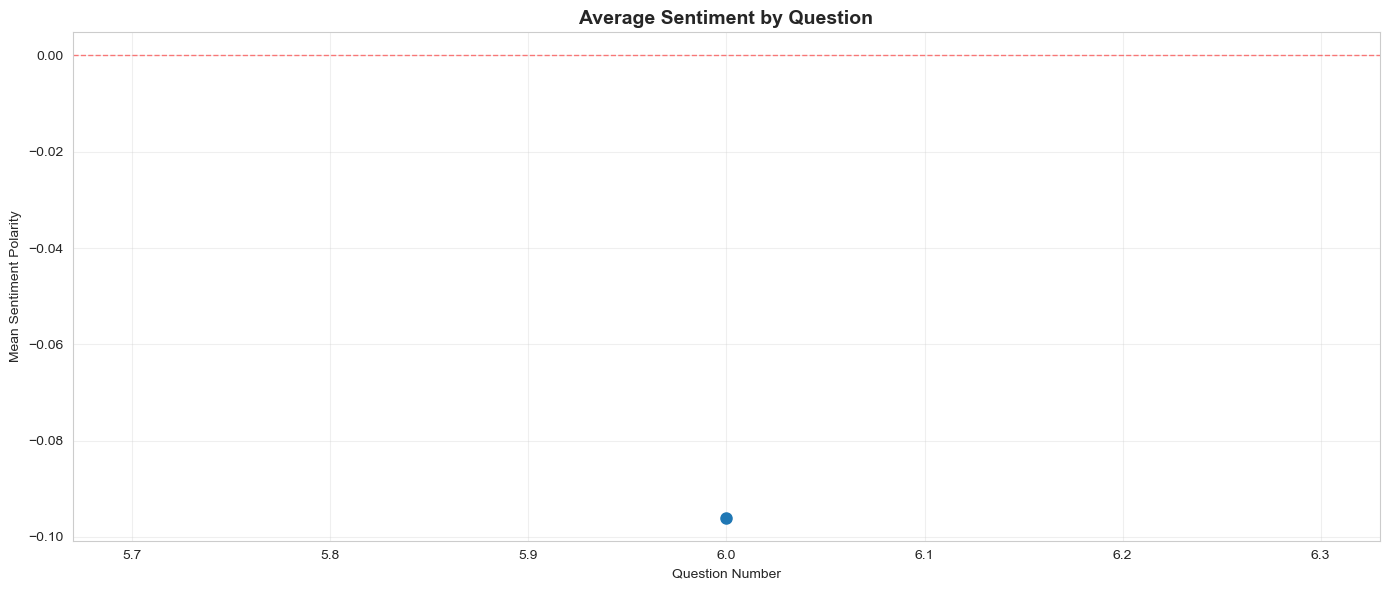

In [21]:
# Calculate average sentiment by question
question_sentiment = df.groupby('question_number').agg({
    'sentiment_polarity': ['mean', 'median', 'std', 'count']
}).round(3)

question_sentiment.columns = ['Mean_Polarity', 'Median_Polarity', 'Std_Polarity', 'Response_Count']

print("Sentiment by Question Number:")
print("="*80)
display(question_sentiment)

# Visualize sentiment by question
plt.figure(figsize=(14, 6))
plt.plot(question_sentiment.index, question_sentiment['Mean_Polarity'], marker='o', linewidth=2, markersize=8)
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)
plt.xlabel('Question Number')
plt.ylabel('Mean Sentiment Polarity')
plt.title('Average Sentiment by Question', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Sentiment Distribution by Party (Detailed)

## Top 5 Positive & Negative Candidates - Question-by-Question Analysis

In [22]:
# Get top 5 most positive and top 5 most negative candidates
top_5_positive = candidate_sentiment.head(5).index
top_5_negative = candidate_sentiment.tail(5).index

print("Top 5 Most Positive Candidates:")
print("="*80)
for idx, (name, party) in enumerate(top_5_positive, 1):
    mean_pol = candidate_sentiment.loc[(name, party), 'Mean_Polarity']
    print(f"{idx}. {name} ({party}) - Mean Polarity: {mean_pol:.3f}")

print("\n\nTop 5 Most Negative Candidates:")
print("="*80)
for idx, (name, party) in enumerate(top_5_negative, 1):
    mean_pol = candidate_sentiment.loc[(name, party), 'Mean_Polarity']
    print(f"{idx}. {name} ({party}) - Mean Polarity: {mean_pol:.3f}")

# Combine the top and bottom candidates
selected_candidates = list(top_5_positive) + list(top_5_negative)

# Filter dataframe for selected candidates
df_selected = df[df.set_index(['name', 'party']).index.isin(selected_candidates)].copy()

print(f"\n\nTotal responses from selected candidates: {len(df_selected)}")

Top 5 Most Positive Candidates:
1. Jacob Rosenberg (C) - Mean Polarity: 0.119
2. Freja Fokdal (B) - Mean Polarity: 0.063
3. Merete Winther Hildebrandt (C) - Mean Polarity: 0.043
4. August Gade (F) - Mean Polarity: 0.020
5. Nikolaj Rachdi Bührmann (F) - Mean Polarity: 0.015


Top 5 Most Negative Candidates:
1. Helle Sjelle (M) - Mean Polarity: -0.219
2. Rasmus Holme (Ø) - Mean Polarity: -0.242
3. Joachim Høyrup (V) - Mean Polarity: -0.247
4. Nikolaj Bøgh (C) - Mean Polarity: -0.249
5. Michella Lescher (F) - Mean Polarity: -0.282


Total responses from selected candidates: 10


### Sentiment by Question for Selected Candidates

In [23]:
# Create a pivot table for visualization: candidates x questions
df_selected['candidate_label'] = df_selected['name'] + ' (' + df_selected['party'] + ')'

# Calculate mean sentiment by candidate and question
sentiment_by_q = df_selected.groupby(['candidate_label', 'question_number'])['sentiment_polarity'].mean().reset_index()

# Pivot for heatmap
sentiment_pivot = sentiment_by_q.pivot(index='candidate_label', columns='question_number', values='sentiment_polarity')

# Sort by overall mean sentiment (positive at top, negative at bottom)
candidate_order = df_selected.groupby('candidate_label')['sentiment_polarity'].mean().sort_values(ascending=False).index
sentiment_pivot = sentiment_pivot.reindex(candidate_order)

print("Sentiment by Question for Top 5 Positive and Top 5 Negative Candidates:")
print("="*80)
display(sentiment_pivot.round(3))

Sentiment by Question for Top 5 Positive and Top 5 Negative Candidates:


question_number,6
candidate_label,
Jacob Rosenberg (C),0.119
Freja Fokdal (B),0.063
Merete Winther Hildebrandt (C),0.043
August Gade (F),0.020
Nikolaj Rachdi Bührmann (F),0.015
Helle Sjelle (M),-0.219
Rasmus Holme (Ø),-0.242
Joachim Høyrup (V),-0.247
Nikolaj Bøgh (C),-0.249


### Heatmap Visualization

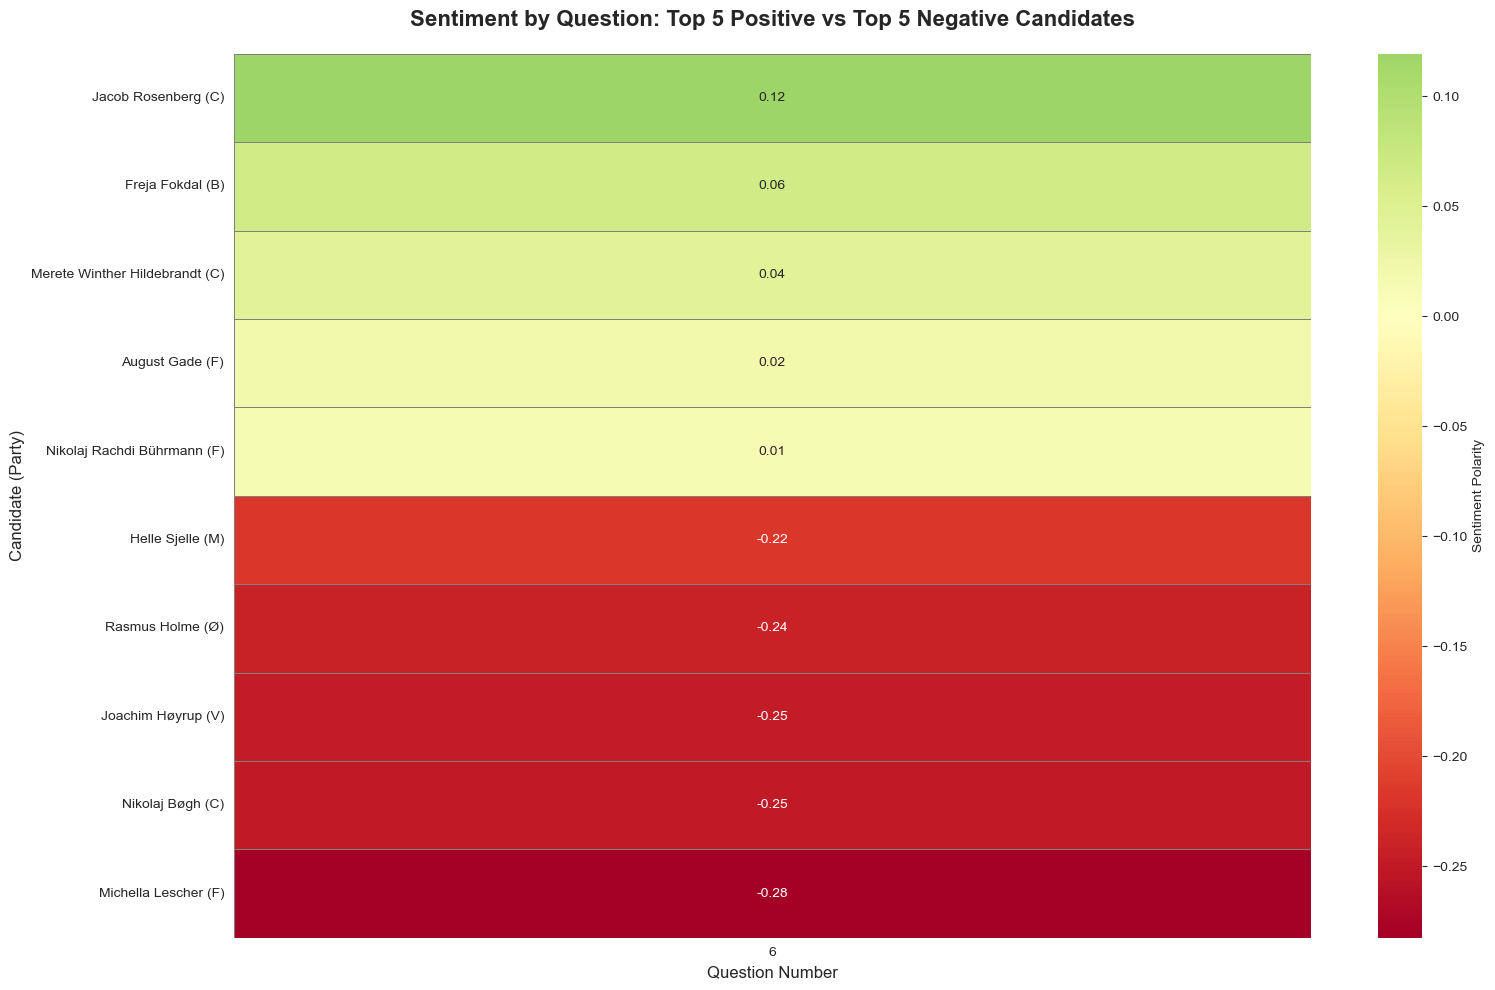


💡 Interpretation:
   Green = Positive sentiment
   Yellow = Neutral sentiment
   Red = Negative sentiment


In [24]:
# Create heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(sentiment_pivot, 
            annot=True, 
            fmt='.2f', 
            cmap='RdYlGn', 
            center=0, 
            cbar_kws={'label': 'Sentiment Polarity'},
            linewidths=0.5,
            linecolor='gray')

plt.title('Sentiment by Question: Top 5 Positive vs Top 5 Negative Candidates', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Question Number', fontsize=12)
plt.ylabel('Candidate (Party)', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("   Green = Positive sentiment")
print("   Yellow = Neutral sentiment")
print("   Red = Negative sentiment")

### Line Plot: Sentiment Trends Across Questions

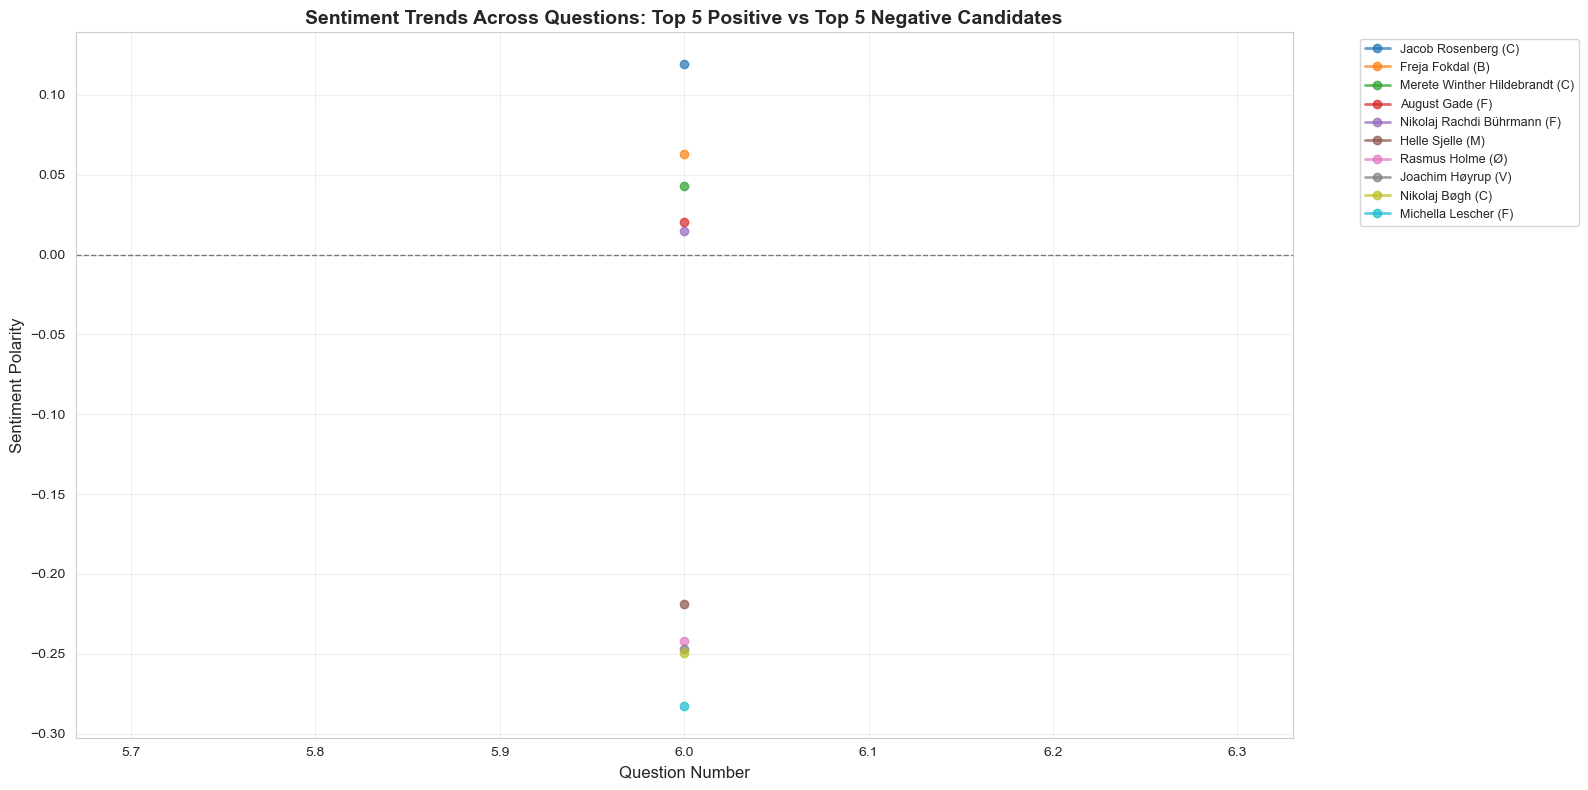

In [25]:
# Create line plot showing sentiment trends
plt.figure(figsize=(16, 8))

# Plot each candidate
for candidate in sentiment_pivot.index:
    plt.plot(sentiment_pivot.columns, 
             sentiment_pivot.loc[candidate], 
             marker='o', 
             linewidth=2, 
             markersize=6,
             label=candidate,
             alpha=0.7)

plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.xlabel('Question Number', fontsize=12)
plt.ylabel('Sentiment Polarity', fontsize=12)
plt.title('Sentiment Trends Across Questions: Top 5 Positive vs Top 5 Negative Candidates', 
          fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Detailed Question Analysis for Each Candidate

In [26]:
# Show detailed breakdown for each candidate
print("="*100)
print("DETAILED QUESTION-BY-QUESTION SENTIMENT ANALYSIS")
print("="*100)

for candidate in sentiment_pivot.index:
    print(f"\n{candidate}")
    print("-" * 100)
    
    # Get data for this candidate
    candidate_data = sentiment_by_q[sentiment_by_q['candidate_label'] == candidate].sort_values('question_number')
    
    # Display as a table
    display(candidate_data[['question_number', 'sentiment_polarity']].set_index('question_number').T)
    
    # Calculate statistics
    mean_sentiment = candidate_data['sentiment_polarity'].mean()
    max_sentiment = candidate_data['sentiment_polarity'].max()
    min_sentiment = candidate_data['sentiment_polarity'].min()
    max_q = candidate_data.loc[candidate_data['sentiment_polarity'].idxmax(), 'question_number']
    min_q = candidate_data.loc[candidate_data['sentiment_polarity'].idxmin(), 'question_number']
    
    print(f"\n  📊 Statistics:")
    print(f"     Overall Mean: {mean_sentiment:.3f}")
    print(f"     Most Positive: Q{max_q:.0f} ({max_sentiment:.3f})")
    print(f"     Most Negative: Q{min_q:.0f} ({min_sentiment:.3f})")
    print(f"     Range: {max_sentiment - min_sentiment:.3f}")
    
print("\n" + "="*100)

DETAILED QUESTION-BY-QUESTION SENTIMENT ANALYSIS

Jacob Rosenberg (C)
----------------------------------------------------------------------------------------------------


question_number,6
sentiment_polarity,0.119167



  📊 Statistics:
     Overall Mean: 0.119
     Most Positive: Q6 (0.119)
     Most Negative: Q6 (0.119)
     Range: 0.000

Freja Fokdal (B)
----------------------------------------------------------------------------------------------------


question_number,6
sentiment_polarity,0.063333



  📊 Statistics:
     Overall Mean: 0.063
     Most Positive: Q6 (0.063)
     Most Negative: Q6 (0.063)
     Range: 0.000

Merete Winther Hildebrandt (C)
----------------------------------------------------------------------------------------------------


question_number,6
sentiment_polarity,0.042857



  📊 Statistics:
     Overall Mean: 0.043
     Most Positive: Q6 (0.043)
     Most Negative: Q6 (0.043)
     Range: 0.000

August Gade (F)
----------------------------------------------------------------------------------------------------


question_number,6
sentiment_polarity,0.02037



  📊 Statistics:
     Overall Mean: 0.020
     Most Positive: Q6 (0.020)
     Most Negative: Q6 (0.020)
     Range: 0.000

Nikolaj Rachdi Bührmann (F)
----------------------------------------------------------------------------------------------------


question_number,6
sentiment_polarity,0.014815



  📊 Statistics:
     Overall Mean: 0.015
     Most Positive: Q6 (0.015)
     Most Negative: Q6 (0.015)
     Range: 0.000

Helle Sjelle (M)
----------------------------------------------------------------------------------------------------


question_number,6
sentiment_polarity,-0.218889



  📊 Statistics:
     Overall Mean: -0.219
     Most Positive: Q6 (-0.219)
     Most Negative: Q6 (-0.219)
     Range: 0.000

Rasmus Holme (Ø)
----------------------------------------------------------------------------------------------------


question_number,6
sentiment_polarity,-0.241667



  📊 Statistics:
     Overall Mean: -0.242
     Most Positive: Q6 (-0.242)
     Most Negative: Q6 (-0.242)
     Range: 0.000

Joachim Høyrup (V)
----------------------------------------------------------------------------------------------------


question_number,6
sentiment_polarity,-0.247024



  📊 Statistics:
     Overall Mean: -0.247
     Most Positive: Q6 (-0.247)
     Most Negative: Q6 (-0.247)
     Range: 0.000

Nikolaj Bøgh (C)
----------------------------------------------------------------------------------------------------


question_number,6
sentiment_polarity,-0.249306



  📊 Statistics:
     Overall Mean: -0.249
     Most Positive: Q6 (-0.249)
     Most Negative: Q6 (-0.249)
     Range: 0.000

Michella Lescher (F)
----------------------------------------------------------------------------------------------------


question_number,6
sentiment_polarity,-0.282465



  📊 Statistics:
     Overall Mean: -0.282
     Most Positive: Q6 (-0.282)
     Most Negative: Q6 (-0.282)
     Range: 0.000



<Figure size 1400x700 with 0 Axes>

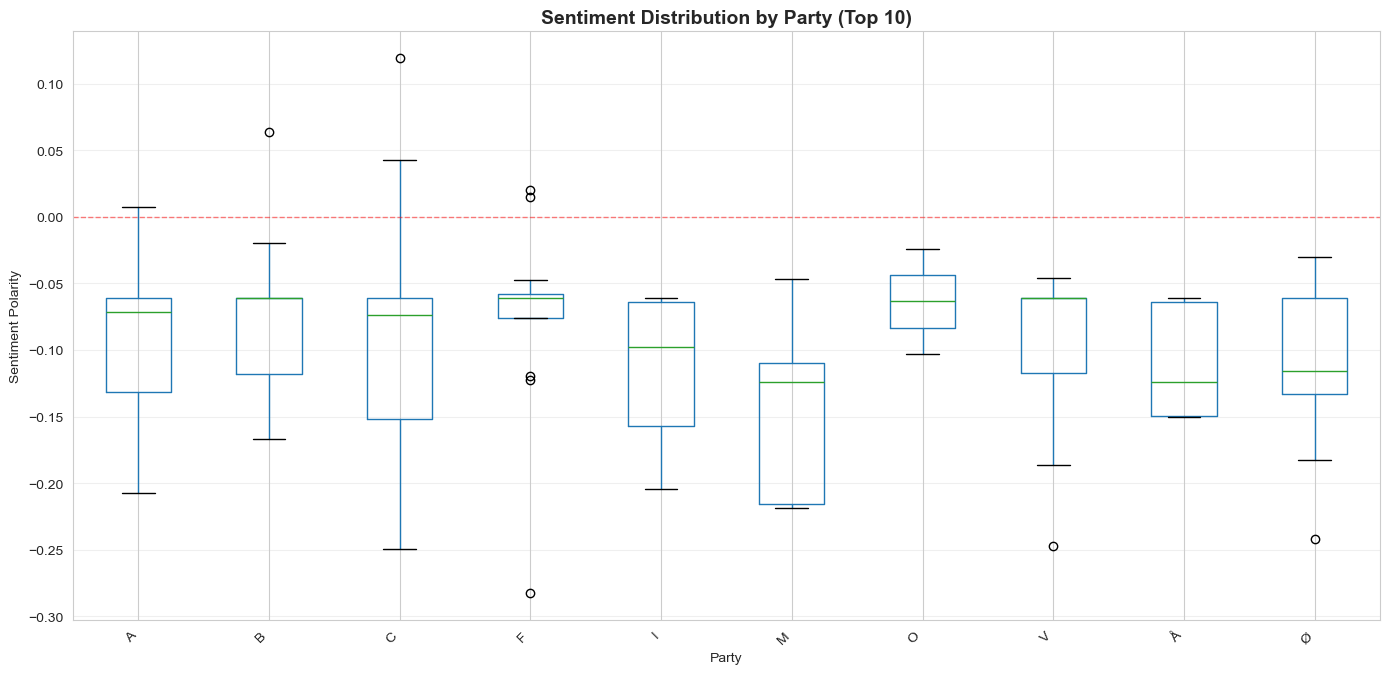

In [27]:
# Get top parties by response count
top_10_parties = df['party'].value_counts().head(10).index

# Filter data for top parties
df_top_parties = df[df['party'].isin(top_10_parties)]

# Create box plot
plt.figure(figsize=(14, 7))
df_top_parties.boxplot(column='sentiment_polarity', by='party', figsize=(14, 7))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Party')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Distribution by Party (Top 10)', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove automatic title
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Export Results

In [28]:
# Save full dataset with sentiment analysis
output_file = 'cleaned_01_with_sentiment.csv'
df.to_csv(output_file, index=False, encoding='utf-8')
print(f"✅ Full dataset with sentiment saved to: {output_file}")

# Save party sentiment summary
party_sentiment.to_csv('sentiment_by_party.csv', encoding='utf-8')
print(f"✅ Party sentiment summary saved to: sentiment_by_party.csv")

# Save candidate sentiment summary
candidate_sentiment.to_csv('sentiment_by_candidate.csv', encoding='utf-8')
print(f"✅ Candidate sentiment summary saved to: sentiment_by_candidate.csv")

# Save question sentiment summary
question_sentiment.to_csv('sentiment_by_question.csv', encoding='utf-8')
print(f"✅ Question sentiment summary saved to: sentiment_by_question.csv")

print(f"\n📊 Analysis Complete!")
print(f"   Total responses analyzed: {len(df)}")
print(f"   Files generated: 4")

✅ Full dataset with sentiment saved to: cleaned_01_with_sentiment.csv
✅ Party sentiment summary saved to: sentiment_by_party.csv
✅ Candidate sentiment summary saved to: sentiment_by_candidate.csv
✅ Question sentiment summary saved to: sentiment_by_question.csv

📊 Analysis Complete!
   Total responses analyzed: 119
   Files generated: 4


## Summary Statistics

In [29]:
print("\n" + "="*80)
print("SENTIMENT ANALYSIS SUMMARY")
print("="*80)

print(f"\nOverall Statistics:")
print(f"  Total responses analyzed: {len(df)}")
print(f"  Mean sentiment polarity: {df['sentiment_polarity'].mean():.3f}")
print(f"  Median sentiment polarity: {df['sentiment_polarity'].median():.3f}")
print(f"  Std deviation: {df['sentiment_polarity'].std():.3f}")

print(f"\nSentiment Categories:")
for category, count in df['sentiment_category'].value_counts().items():
    percentage = (count / len(df)) * 100
    print(f"  {category}: {count} ({percentage:.1f}%)")

print(f"\nMost Positive Party: {party_sentiment.index[0]}")
print(f"  Mean polarity: {party_sentiment.iloc[0]['Mean_Polarity']:.3f}")

print(f"\nMost Negative Party: {party_sentiment.index[-1]}")
print(f"  Mean polarity: {party_sentiment.iloc[-1]['Mean_Polarity']:.3f}")

print(f"\nMost Positive Question: {question_sentiment['Mean_Polarity'].idxmax()}")
print(f"  Mean polarity: {question_sentiment['Mean_Polarity'].max():.3f}")

print(f"\nMost Negative Question: {question_sentiment['Mean_Polarity'].idxmin()}")
print(f"  Mean polarity: {question_sentiment['Mean_Polarity'].min():.3f}")

print("\n" + "="*80)


SENTIMENT ANALYSIS SUMMARY

Overall Statistics:
  Total responses analyzed: 119
  Mean sentiment polarity: -0.096
  Median sentiment polarity: -0.064
  Std deviation: 0.066

Sentiment Categories:
  Neutral: 67 (56.3%)
  Negative: 51 (42.9%)
  Positive: 1 (0.8%)

Most Positive Party: T
  Mean polarity: -0.047

Most Negative Party: M
  Mean polarity: -0.143

Most Positive Question: 6
  Mean polarity: -0.096

Most Negative Question: 6
  Mean polarity: -0.096

